# Diabetes Prediction Using Machine Learning

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

***Data Collection & Analysis***

**PIMA Diabetes dataset**

In [4]:
# Loading The Diabetes Dataset To a Pandas Dataframe
diabetes_dataset=pd.read_csv('Downloads/diabetes (1).csv')

In [5]:
# Print The First 5 Rows Of The Dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# Number Of Rows & Columns In The Dataset
diabetes_dataset.shape

(768, 9)

In [7]:
# The Statistical Measures Of The Data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

**0 --> Non Diabetic**

**1 --> Diabetic**

In [10]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


***Bar Plot For Outcome***

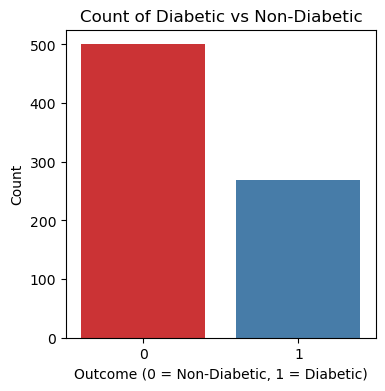

In [12]:
plt.figure(figsize=(4,4))
sns.countplot(x='Outcome', hue='Outcome', data=diabetes_dataset, palette='Set1', legend=False)
plt.title('Count of Diabetic vs Non-Diabetic')
plt.xlabel('Outcome (0 = Non-Diabetic, 1 = Diabetic)')
plt.ylabel('Count')
plt.show()

***Heatmap Of Correlation Matrix***

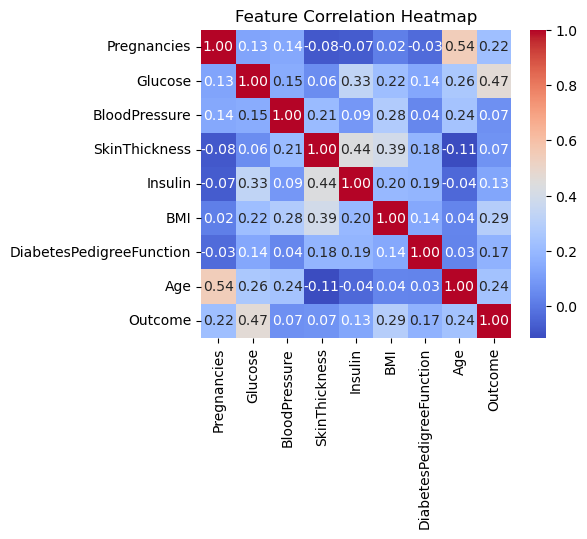

In [14]:
plt.figure(figsize=(5,4))
correlation = diabetes_dataset.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

***Glucose Level Distribution by Outcome***

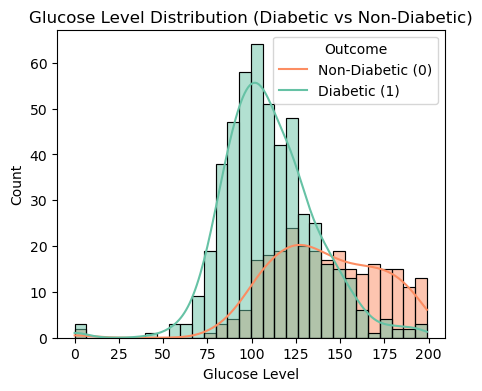

In [16]:
plt.figure(figsize=(5,4))
sns.histplot(data=diabetes_dataset, x='Glucose', hue='Outcome', kde=True, palette='Set2', bins=30)
plt.title('Glucose Level Distribution (Diabetic vs Non-Diabetic)')
plt.xlabel('Glucose Level')
plt.ylabel('Count')
plt.legend(title='Outcome', labels=['Non-Diabetic (0)', 'Diabetic (1)'])
plt.show()

***Box Plot Visualization Of Dataset Features***

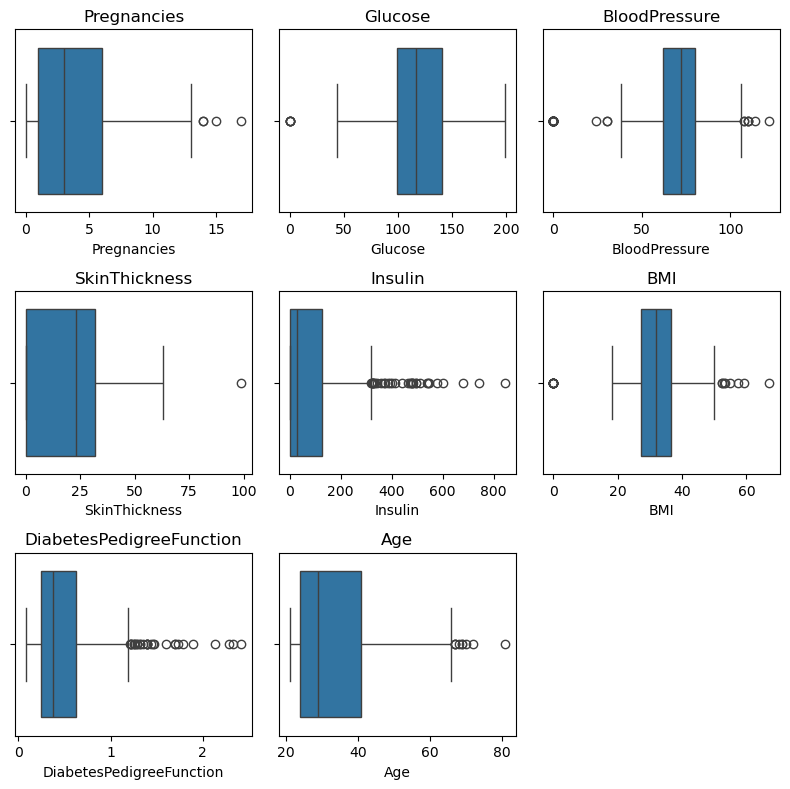

In [52]:
plt.figure(figsize=(8, 8))
for i, col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                         'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=diabetes_dataset[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [18]:
# Separating The Data & Labels
X=diabetes_dataset.drop(columns='Outcome',axis=1)
Y=diabetes_dataset['Outcome']
print(X.head())
print(Y.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


***Data Standardization***

In [20]:
# Create the scaler
scaler = StandardScaler()
# Fit the scaler to your data
scaler.fit(X)
# Now transform the data
standardized_data = scaler.transform(X)
# Convert to DataFrame for better readability
standardized_df = pd.DataFrame(standardized_data)
# Print the first 5 rows
print(standardized_df.head())
_ = None

          0         1         2         3         4         5         6  \
0  0.639947  0.848324  0.149641  0.907270 -0.692891  0.204013  0.468492   
1 -0.844885 -1.123396 -0.160546  0.530902 -0.692891 -0.684422 -0.365061   
2  1.233880  1.943724 -0.263941 -1.288212 -0.692891 -1.103255  0.604397   
3 -0.844885 -0.998208 -0.160546  0.154533  0.123302 -0.494043 -0.920763   
4 -1.141852  0.504055 -1.504687  0.907270  0.765836  1.409746  5.484909   

          7  
0  1.425995  
1 -0.190672  
2 -0.105584  
3 -1.041549  
4 -0.020496  


In [21]:
X=standardized_data
Y=diabetes_dataset['Outcome']
print(X[:5])
print(Y[:5])

[[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575  0.53090156 -0.69289057 -0.68442195
  -0.36506078 -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 -1.28821221 -0.69289057 -1.10325546
   0.60439732 -0.10558415]
 [-0.84488505 -0.99820778 -0.16054575  0.15453319  0.12330164 -0.49404308
  -0.92076261 -1.04154944]
 [-1.14185152  0.5040552  -1.50468724  0.90726993  0.76583594  1.4097456
   5.4849091  -0.0204964 ]]
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [22]:
# Train Test Split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


***Training The Model***

In [24]:
classifier=svm.SVC(kernel='linear')
# Training The Support Vector Machine Classifier
classifier.fit(X_train,Y_train);

***Model Evalution***

In [26]:
# Accuracy Of Training Data
X_train_prediction=classifier.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
print("Accuracy on Training Data: ",training_data_accuracy)

Accuracy on Training Data:  0.7866449511400652


In [27]:
# Accuracy Of Test Data
X_test_prediction=classifier.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
print("Accuracy on Test Data: ",test_data_accuracy)

Accuracy on Test Data:  0.7727272727272727


***Predictive System***

In [29]:
# Example Input:
input_data = (15,136,70,32,110,37.1,0.153,43)
# Feature Names 
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
# Convert Input To DataFrame
input_df = pd.DataFrame([input_data], columns=feature_names)
std_data = scaler.transform(input_df)
prediction = classifier.predict(std_data)
print("Standardized Input:\n", std_data)
print("Prediction (0 = Not Diabetic, 1 = Diabetic):\n", prediction)

if prediction[0] == 0:
    print("The person is not Diabetic.")
else:
    print("The person is Diabetic.")


Standardized Input:
 [[ 3.31264542  0.47275805  0.04624525  0.71908574  0.26222798  0.64823013
  -0.96304428  0.83038113]]
Prediction (0 = Not Diabetic, 1 = Diabetic):
 [1]
The person is Diabetic.
